In [98]:
import pandas as pd
import sqlite3
%matplotlib inline  
import numpy as np

conn = sqlite3.connect('factbook.db')
query = 'SELECT * FROM sqlite_master WHERE type=\'table\';'
pd.read_sql_query(query,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [99]:
query2= 'SELECT * FROM facts'
conn.execute(query2).fetchmany(5)

[(1,
  'af',
  'Afghanistan',
  652230,
  652230,
  0,
  32564342,
  2.32,
  38.57,
  13.89,
  1.51),
 (2, 'al', 'Albania', 28748, 27398, 1350, 3029278, 0.3, 12.92, 6.58, 3.3),
 (3, 'ag', 'Algeria', 2381741, 2381741, 0, 39542166, 1.84, 23.67, 4.31, 0.92),
 (4, 'an', 'Andorra', 468, 468, 0, 85580, 0.12, 8.13, 6.96, 0.0),
 (5, 'ao', 'Angola', 1246700, 1246700, 0, 19625353, 2.78, 38.78, 11.49, 0.46)]

In [100]:
pd.read_sql_query(query2,conn).head(5)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


In [101]:
query3 = 'SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts'
pd.read_sql_query(query3,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [102]:
query4 = 'SELECT name, population FROM facts WHERE population=0'
pd.read_sql_query(query4,conn)

,name,population
0,Antarctica,0


In [103]:
query5 = 'SELECT name, population FROM facts WHERE population=(SELECT MAX(population) FROM facts)'
pd.read_sql_query(query5,conn)

,name,population
0,World,7256490011


#### En la Antártida no hay personas registradas como habitantes.

#### En el mundo hay 7.256.490.011 de habitantes.

In [104]:
q6 = 'select id FROM facts WHERE population=0'
q7 = 'select id FROM facts WHERE population=7256490011'

print(pd.read_sql_query(q6,conn), pd.read_sql_query(q7,conn))

    id
0  250     id
0  261


In [105]:
df = pd.read_sql_query(query2,conn)
dataframe = df.loc[(df['id']!=250) & (df['id']!=261)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9496caa400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9496bfb048>]], dtype=object)

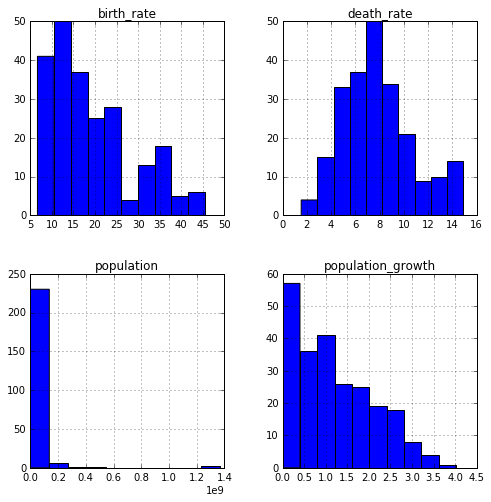

In [106]:
dataframe.hist(column=['population','population_growth','birth_rate','death_rate'],figsize=(8,8))

In [107]:
query_density = 'SELECT name, (CAST(population as Float)/CAST(area_land as Float)) FROM facts LIMIT 5;' 
pd.read_sql_query(query_density,conn)

,name,(CAST(population as Float)/CAST(area_land as Float))
0,Afghanistan,49.927697
1,Albania,110.565662
2,Algeria,16.602211
3,Andorra,182.863248
4,Angola,15.741841


In [111]:
query_density = 'SELECT name,population, area_land, ROUND(MAX(CAST(population as Float)/CAST(area_land as Float)),3) FROM facts LIMIT 5;' 
pd.read_sql_query(query_density,conn)
dataframe["population density"] = dataframe["population"] / dataframe["area_land"]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


#### El lugar con mayor densidad poblacional es MACAU (CHINA) 21.000 personas por km2 !

In [116]:
dataframe["population density"].replace([np.inf,-np.inf],np.nan, inplace=True)
pop_dens = dataframe["population density"].dropna()

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


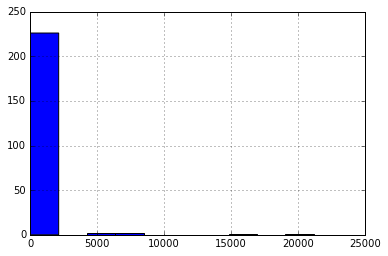

In [117]:
pop_dens.hist()

##### Parece que las densidades superiores  a 5000 habitantes por km2 son muy inusuales, se acumulan todas más cerca de los 1000, vamos a ver.

In [120]:
pop_dens_filtered = pop_dens.loc[pop_dens<1000]

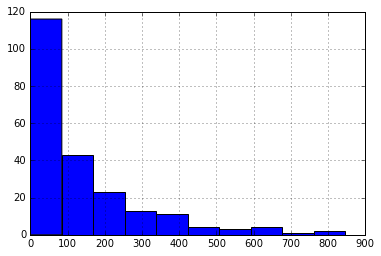

In [121]:
pop_dens_filtered.hist()

#### Gráfico más normal... vamos a filtrar las densidades sobre 1000 hab/km2 

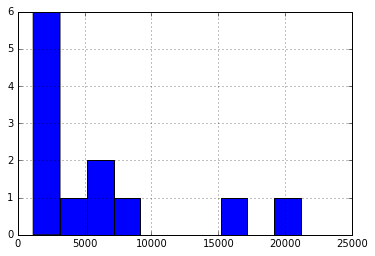

In [122]:
pop_dens_filtered = pop_dens.loc[pop_dens>1000]
pop_dens_filtered.hist()

In [128]:
dataframe["ratio_water_to_land"] = dataframe["area_water"]/dataframe["area_land"]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [129]:
dataframe["ratio_water_to_land"].replace([np.inf, -np.inf,0],np.nan, inplace=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [132]:
dataframe["ratio_water_to_land"].dropna(inplace=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/series.py:2647: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [133]:
dataframe[["name","ratio_water_to_land"]].sort_values(by="ratio_water_to_land",ascending=False)

,name,ratio_water_to_land
227,British Indian Ocean Territory,905.666667
246,Virgin Islands,4.520231
245,Puerto Rico,0.554791
11,"Bahamas, The",0.386613
70,Guinea-Bissau,0.284673
105,Malawi,0.259396
124,Netherlands,0.225710
181,Uganda,0.222922
55,Eritrea,0.164356
98,Liberia,0.156240
